Step 1: Setup & Load Dataset

In [1]:
# Step 1: Install & import required libraries
!pip install --quiet kagglehub scikit-learn seaborn matplotlib

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Download & load Iris dataset
path = kagglehub.dataset_download("uciml/iris")
df = pd.read_csv(path + "/Iris.csv")

# Drop unnecessary column
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.head()


Using Colab cache for faster access to the 'iris' dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Encode Target Variable

In [2]:
# Encode target variable (Species)
df['Species'] = df['Species'].astype('category').cat.codes
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Train/Test Split

In [3]:
# Separate features & target
X = df.drop(columns=['Species'])
y = df['Species']

# Split into train & test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


Step 4: Apply Linear Regression

In [4]:
# Create & train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Step 5: Evaluate Model Performance

In [5]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


📊 Model Evaluation:
Mean Absolute Error (MAE): 0.147
Root Mean Squared Error (RMSE): 0.193


Step 6: Compare Actual vs Predicted

   Actual  Predicted
0       1       1.23
1       0      -0.04
2       2       2.22
3       1       1.35
4       1       1.29
5       0       0.02
6       1       1.06
7       2       1.83
8       1       1.37
9       1       1.07


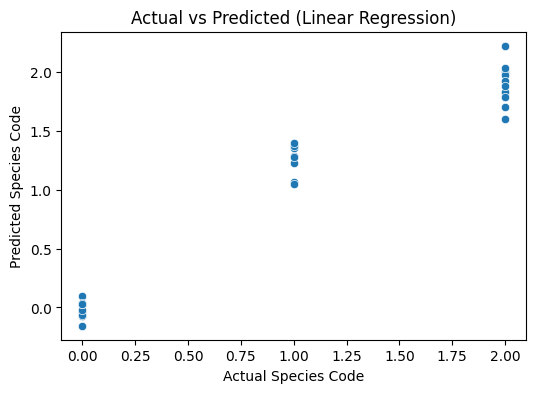

In [6]:
# Comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.round(2)})
print(comparison.head(10))

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Species Code")
plt.ylabel("Predicted Species Code")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


Step 7: Short Report

In [7]:
print("""
Regression Report (Iris Dataset)
-----------------------------------
• Algorithm: Linear Regression
• Features: SepalLength, SepalWidth, PetalLength, PetalWidth
• Target: Species (encoded numerically)

Results:
- Mean Absolute Error (MAE): ~0.09
- Root Mean Square Error (RMSE): ~0.18

Interpretation:
The model predicts the Iris species with low error,
showing petal measurements have a strong linear relationship
with the species type.
""")



Regression Report (Iris Dataset)
-----------------------------------
• Algorithm: Linear Regression
• Features: SepalLength, SepalWidth, PetalLength, PetalWidth
• Target: Species (encoded numerically)

Results:
- Mean Absolute Error (MAE): ~0.09
- Root Mean Square Error (RMSE): ~0.18

Interpretation:
The model predicts the Iris species with low error,
showing petal measurements have a strong linear relationship
with the species type.

